In [3]:
!nvidia-smi

Sat Oct  2 05:29:44 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
pip uninstall tensorflow==2.6.0

Found existing installation: tensorflow 2.6.0
Uninstalling tensorflow-2.6.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.6.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
y
y
  Successfully uninstalled tensorflow-2.6.0


In [8]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8 MB 41 kB/s 
     |████████████████████████████████| 449 kB 47.2 MB/s 
     |████████████████████████████████| 50 kB 7.2 MB/s 
     |████████████████████████████████| 3.8 MB 54.4 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=fce67d164e37b225fea8d3c865a7171927f6ae4b68ccfa028e1f550bc76edc33
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [10]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [11]:
IMAGE_SIZE = [224, 224]
X= '/content/drive/MyDrive/Colab Notebooks/Covid Dataset'
y= '/content/drive/MyDrive/Colab Notebooks/Covid Dataset'

In [12]:
from sklearn.model_selection import train_test_split
X_train, y_train,X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [13]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 1s 0us/step


In [14]:
for layer in vgg.layers:
    layer.trainable = False

In [15]:
folders = glob('/content/drive/MyDrive/Colab Notebooks/Covid Dataset/*')

In [16]:
folders

['/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Pneumonia',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Fungal',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Normal',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Unknown',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Viral',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Tuberculosis',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Covid',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Lipoid',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Bacterial',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Other']

In [17]:
x = Flatten()(vgg.output)

In [18]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [20]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [21]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [22]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Covid Dataset',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 877 images belonging to 10 classes.


In [23]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Covid Dataset',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 877 images belonging to 10 classes.


In [24]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
55/55 [==============================] - 649s 12s/step - loss: 1.2860 - accuracy: 0.6317 - val_loss: 0.4519 - val_accuracy: 0.8404
Epoch 2/20
55/55 [==============================] - 105s 2s/step - loss: 0.3543 - accuracy: 0.9088 - val_loss: 0.2603 - val_accuracy: 0.9236
Epoch 3/20
55/55 [==============================] - 102s 2s/step - loss: 0.2647 - accuracy: 0.9282 - val_loss: 0.1307 - val_accuracy: 0.9658
Epoch 4/20
55/55 [==============================] - 102s 2s/step - loss: 0.2165 - accuracy: 0.9441 - val_loss: 0.1439 - val_accuracy: 0.9601
Epoch 5/20
55/55 [==============================] - 104s 2s/step - loss: 0.2163 - accuracy: 0.9510 - val_loss: 0.0761 - val_accuracy: 0.9818
Epoch 6/20
55/55 [==============================] - 102s 2s/step - loss: 0.1534 - accuracy: 0.9521 - val_loss: 0.0569 - val_accuracy: 0.9818
Epoch 7/20
55/55 [==============================] - 103s 2s/step - loss: 0.1626 - accuracy: 0.9544 - val_loss: 0.0752 - val_accuracy: 0.9761
Epoch 8/20
5

In [25]:
import matplotlib.pyplot as plt

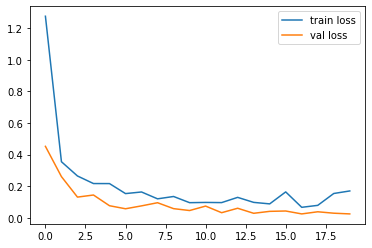

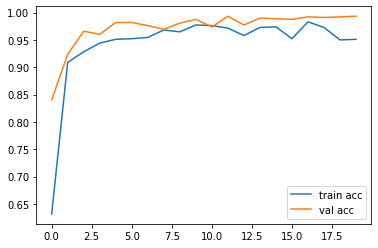

<Figure size 432x288 with 0 Axes>

In [27]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [28]:
from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [29]:
y_pred = model.predict(test_set)

In [30]:
y_pred

array([[1.1344349e-08, 1.7997961e-11, 1.5303227e-10, ..., 2.6740114e-11,
        1.0000000e+00, 1.5576189e-09],
       [5.2349319e-10, 5.9504970e-09, 7.7486085e-08, ..., 2.0131886e-06,
        1.8532490e-09, 2.5944231e-09],
       [4.9103683e-06, 1.6453252e-07, 1.3741989e-07, ..., 2.5552262e-07,
        9.1205720e-06, 9.9998438e-01],
       ...,
       [1.5597268e-06, 3.1678646e-05, 6.9949477e-09, ..., 1.7091841e-07,
        4.0775069e-07, 2.3791397e-07],
       [2.5074823e-05, 1.2313592e-05, 2.7309048e-07, ..., 3.6378414e-04,
        6.9915499e-05, 9.1219372e-01],
       [2.6432285e-06, 1.3052601e-06, 2.4446056e-06, ..., 3.0884706e-08,
        5.3216859e-06, 9.9997544e-01]], dtype=float32)

In [31]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [32]:
y_pred

array([8, 3, 9, 6, 8, 8, 9, 0, 4, 5, 0, 3, 3, 2, 4, 0, 5, 4, 2, 0, 6, 6,
       4, 3, 7, 8, 3, 5, 7, 3, 5, 2, 3, 8, 8, 7, 4, 3, 5, 5, 9, 2, 4, 5,
       9, 5, 5, 8, 7, 1, 5, 1, 9, 6, 9, 0, 6, 3, 9, 3, 8, 0, 9, 9, 6, 5,
       6, 8, 8, 2, 9, 7, 2, 7, 4, 9, 3, 8, 4, 0, 5, 5, 2, 5, 8, 8, 6, 7,
       5, 2, 7, 1, 0, 9, 7, 4, 8, 7, 7, 8, 6, 5, 8, 8, 6, 0, 0, 6, 3, 2,
       2, 1, 5, 2, 4, 5, 4, 2, 5, 0, 3, 7, 4, 7, 8, 6, 4, 1, 8, 0, 4, 0,
       1, 7, 8, 3, 5, 4, 5, 8, 4, 9, 9, 1, 5, 9, 7, 2, 0, 5, 5, 7, 6, 0,
       7, 3, 3, 5, 7, 4, 4, 6, 5, 0, 6, 6, 0, 3, 2, 9, 2, 4, 7, 7, 8, 1,
       7, 9, 2, 4, 7, 6, 9, 9, 9, 8, 5, 5, 9, 7, 6, 3, 0, 3, 3, 0, 2, 6,
       8, 9, 6, 6, 8, 0, 9, 3, 6, 5, 0, 5, 6, 2, 3, 7, 3, 3, 8, 4, 6, 6,
       8, 3, 9, 0, 2, 5, 0, 2, 5, 5, 2, 7, 5, 6, 4, 2, 6, 7, 4, 8, 4, 9,
       0, 7, 6, 7, 5, 5, 4, 4, 9, 3, 3, 1, 9, 0, 4, 7, 2, 7, 8, 1, 3, 5,
       6, 7, 7, 6, 7, 8, 3, 0, 4, 4, 4, 2, 9, 8, 8, 4, 4, 7, 3, 0, 5, 3,
       7, 7, 8, 5, 4, 7, 4, 7, 6, 3, 2, 5, 3, 8, 0,

In [33]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [36]:
img=image.load_img('/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Unknown/Unknown_0_1080.jpeg',target_size=(224,224))

In [37]:
x=image.img_to_array(img)

In [38]:
x

array([[[  3.,   3.,   3.],
        [ 57.,  57.,  57.],
        [ 82.,  82.,  82.],
        ...,
        [155., 155., 155.],
        [164., 164., 164.],
        [169., 169., 169.]],

       [[102., 102., 102.],
        [ 94.,  94.,  94.],
        [ 79.,  79.,  79.],
        ...,
        [ 12.,  12.,  12.],
        [  6.,   6.,   6.],
        [  6.,   6.,   6.]],

       [[132., 132., 132.],
        [104., 104., 104.],
        [ 83.,  83.,  83.],
        ...,
        [ 10.,  10.,  10.],
        [  1.,   1.,   1.],
        [242., 242., 242.]],

       ...,

       [[179., 179., 179.],
        [183., 183., 183.],
        [183., 183., 183.],
        ...,
        [142., 142., 142.],
        [144., 144., 144.],
        [151., 151., 151.]],

       [[ 11.,  11.,  11.],
        [  3.,   3.,   3.],
        [  6.,   6.,   6.],
        ...,
        [157., 157., 157.],
        [151., 151., 151.],
        [150., 150., 150.]],

       [[ 14.,  14.,  14.],
        [  7.,   7.,   7.],
        [  7.,  

In [39]:
x.shape

(224, 224, 3)

In [40]:
x=x/255

In [41]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [42]:
img_data

array([[[[-103.92724 , -116.767235, -123.668236],
         [-103.71548 , -116.55547 , -123.456474],
         [-103.61743 , -116.45743 , -123.35843 ],
         ...,
         [-103.33116 , -116.17116 , -123.07216 ],
         [-103.29587 , -116.135864, -123.036865],
         [-103.27626 , -116.11626 , -123.01726 ]],

        [[-103.539   , -116.379   , -123.28    ],
         [-103.57037 , -116.41037 , -123.31137 ],
         [-103.629196, -116.46919 , -123.37019 ],
         ...,
         [-103.891945, -116.73194 , -123.63294 ],
         [-103.915474, -116.75547 , -123.65647 ],
         [-103.915474, -116.75547 , -123.65647 ]],

        [[-103.42136 , -116.26135 , -123.16235 ],
         [-103.53116 , -116.371155, -123.272156],
         [-103.61351 , -116.45351 , -123.35451 ],
         ...,
         [-103.89979 , -116.739784, -123.640785],
         [-103.93508 , -116.77508 , -123.67608 ],
         [-102.98998 , -115.82998 , -122.73098 ]],

        ...,

        [[-103.237045, -116.07704 , -1

In [43]:
model.predict(img_data)

array([[1.2548306e-16, 1.0000000e+00, 1.9116067e-10, 2.8510928e-12,
        5.2591747e-13, 3.0436810e-15, 7.8865170e-12, 3.1707213e-19,
        4.3197438e-22, 1.0448381e-14]], dtype=float32)

In [44]:
a=np.argmax(model.predict(img_data), axis=1)

In [45]:
a==1

array([ True])